# Initialization

## Loading Packages

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 解決中文字型

In [67]:
from matplotlib.font_manager import FontProperties

In [68]:
# 先檢查 Colab 目前 Python 版本（至小數點下兩位），得知將來字形檔安裝路徑
!python --version

# 下載台北思源黑體，並命名taipei_sans_tc_beta.ttf
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 移至指定路徑（若 Python 版本並非 3.10，則需配合更改）
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf

# 自定義字體變數（若 Python 版本並非 3.10，則需配合更改）
myfont = FontProperties(fname=r'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# 後續在相關函式中，使用 myfont 做為指定字形即可。
# 如：plt.xlabel("時間", fontproperties=myfont)
# 如：plt.legend(loc='best', prop=myfont)

Python 3.10.12
--2023-09-29 18:33:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.197.138, 74.125.197.101, 74.125.197.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nvonb3cg3d4mm3oe9d97s4pncptr51ou/1696012350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=627ce9d6-33c1-4464-8ccc-fdfe0c7c27c1 [following]
--2023-09-29 18:33:28--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nvonb3cg3d4mm3oe9d97s4pncptr51ou/1696012350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=627ce9d6-33c1-4464-8ccc-fdfe0c7c27c1
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Conne

## Loading Data

In [69]:
import os

Dataset_File = "WeatherData.csv"
if not os.path.isfile(Dataset_File):
  os.system("wget https://raw.githubusercontent.com/cnchi/datasets/master/" + Dataset_File)

In [70]:
data_path = "/content/WeatherData.csv"
df = pd.read_csv(data_path)

# Extra: Data Exploration

In [71]:
import seaborn as sns

In [72]:
df.head()

,觀測日期(day),當日氣壓(hPa),氣溫(℃),相對溼度(%),風速(m/s),降水量(mm)
0,1,996.3,25.7,90,0.3,6.5
1,2,1001.1,28.2,80,0.6,0.0
2,3,1005.1,28.2,79,1.3,4.0
3,4,1005.9,27.0,86,0.6,91.5
4,5,1005.2,27.7,84,0.3,7.0


In [73]:
df.shape

(30, 6)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   觀測日期(day)  30 non-null     int64  
 1   當日氣壓(hPa)  30 non-null     float64
 2   氣溫(℃)      30 non-null     float64
 3   相對溼度(%)    30 non-null     int64  
 4   風速(m/s)    30 non-null     float64
 5   降水量(mm)    30 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.5 KB


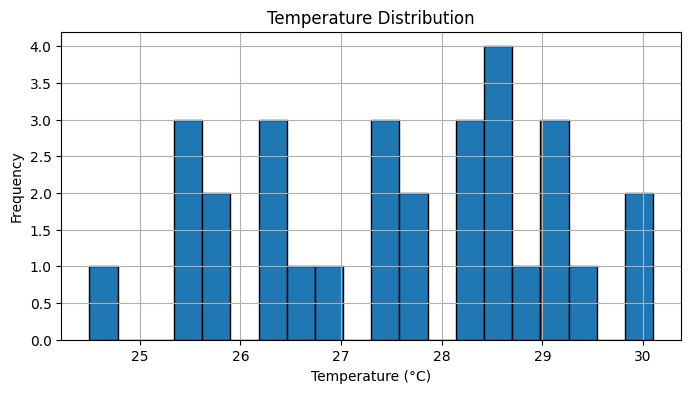

In [75]:
# distribution
plt.figure(figsize=(8, 4))

# If bins is an integer, it defines the number of equal-width bins in the range
plt.hist(df.iloc[:,2], bins=20, edgecolor='k')

plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

           觀測日期(day)  當日氣壓(hPa)     氣溫(℃)   相對溼度(%)   風速(m/s)   降水量(mm)
觀測日期(day)   1.000000   0.381970  0.381008 -0.381849 -0.144258 -0.193927
當日氣壓(hPa)   0.381970   1.000000  0.382765 -0.221174 -0.122390  0.053497
氣溫(℃)       0.381008   0.382765  1.000000 -0.836184 -0.194936 -0.389276
相對溼度(%)    -0.381849  -0.221174 -0.836184  1.000000 -0.211522  0.506766
風速(m/s)    -0.144258  -0.122390 -0.194936 -0.211522  1.000000  0.005893
降水量(mm)    -0.193927   0.053497 -0.389276  0.506766  0.005893  1.000000


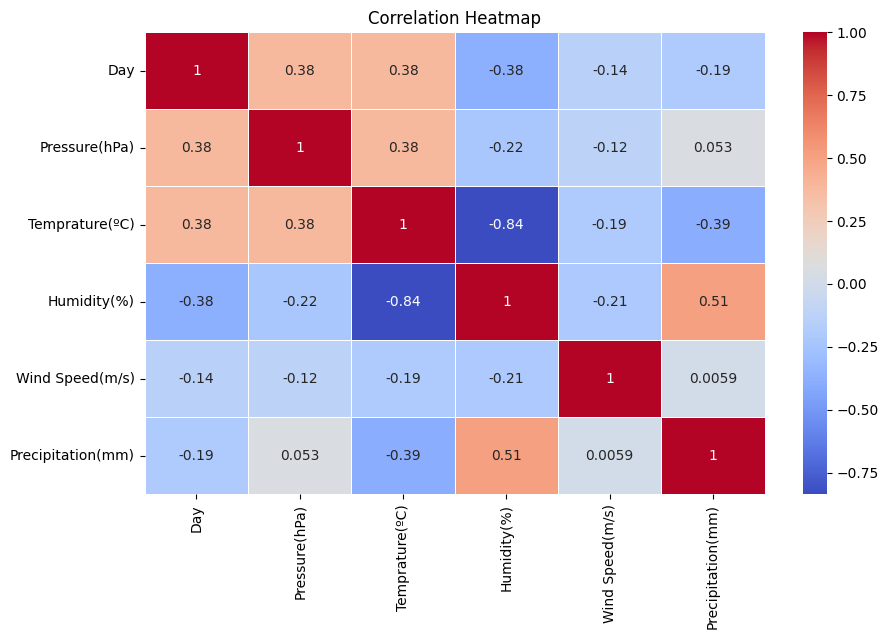

In [76]:
# 尋找個欄位的關聯性
# 比如: 氣溫和相對濕度、降水量與相對濕度
corr_col = ["Day", "Pressure(hPa)", "Temprature(ºC)", "Humidity(%)", "Wind Speed(m/s)", "Precipitation(mm)"]
correlation_matrix = df.iloc[:, :].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,
            xticklabels=corr_col, yticklabels=corr_col)
plt.title('Correlation Heatmap')
plt.show()

In [77]:
# 嘗試找出降水量中的outlier
from scipy import stats

z_scores = stats.zscore(df.iloc[:, 5])
outliers = df[abs(z_scores) > 3]
print(outliers)

   觀測日期(day)  當日氣壓(hPa)  氣溫(℃)  相對溼度(%)  風速(m/s)  降水量(mm)
3          4     1005.9   27.0       86      0.6     91.5


# 作業要求

## 1. 讀入data結果

In [78]:
df.head()

,觀測日期(day),當日氣壓(hPa),氣溫(℃),相對溼度(%),風速(m/s),降水量(mm)
0,1,996.3,25.7,90,0.3,6.5
1,2,1001.1,28.2,80,0.6,0.0
2,3,1005.1,28.2,79,1.3,4.0
3,4,1005.9,27.0,86,0.6,91.5
4,5,1005.2,27.7,84,0.3,7.0


## 2. 轉換成 NumPy 陣列

In [79]:
df.to_numpy()[:10]

array([[1.0000e+00, 9.9630e+02, 2.5700e+01, 9.0000e+01, 3.0000e-01,
        6.5000e+00],
       [2.0000e+00, 1.0011e+03, 2.8200e+01, 8.0000e+01, 6.0000e-01,
        0.0000e+00],
       [3.0000e+00, 1.0051e+03, 2.8200e+01, 7.9000e+01, 1.3000e+00,
        4.0000e+00],
       [4.0000e+00, 1.0059e+03, 2.7000e+01, 8.6000e+01, 6.0000e-01,
        9.1500e+01],
       [5.0000e+00, 1.0052e+03, 2.7700e+01, 8.4000e+01, 3.0000e-01,
        7.0000e+00],
       [6.0000e+00, 1.0048e+03, 2.8300e+01, 7.9000e+01, 4.0000e-01,
        0.0000e+00],
       [7.0000e+00, 1.0058e+03, 2.7700e+01, 8.4000e+01, 6.0000e-01,
        1.0000e+00],
       [8.0000e+00, 1.0036e+03, 2.9000e+01, 7.9000e+01, 6.0000e-01,
        0.0000e+00],
       [9.0000e+00, 1.0013e+03, 2.6500e+01, 9.0000e+01, 6.0000e-01,
        4.0000e+01],
       [1.0000e+01, 9.9910e+02, 2.5600e+01, 9.1000e+01, 4.0000e-01,
        5.3500e+01]])

## 3. 利用 Pandas 的 .describe() 函數，將該資料集的「摘要描述」
* 請注意！.describe() 必須包含正確參數，才能列出「所有」欄位。否則只會列出「數字欄位」，文字欄位將會被省略

In [80]:
df.describe(include="all")

,觀測日期(day),當日氣壓(hPa),氣溫(℃),相對溼度(%),風速(m/s),降水量(mm)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1003.420000,27.566667,82.466667,0.553333,11.933333
std,8.803408,2.844644,1.486568,5.929083,0.333976,22.894712
min,1.000000,996.300000,24.500000,73.000000,0.000000,0.000000
25%,8.250000,1001.400000,26.400000,78.250000,0.300000,0.000000
50%,15.500000,1004.450000,27.700000,82.000000,0.450000,0.500000
75%,22.750000,1005.650000,28.675000,86.750000,0.600000,8.125000
max,30.000000,1007.100000,30.100000,93.000000,1.500000,91.500000


## 4. 請利用 Pandas 的相關函數，計算並印出該資料集的「平均溫度、最高濕度、最低氣壓、總雨量」這四個統計量

In [81]:
df.columns

Index(['觀測日期(day)', '當日氣壓(hPa)', '氣溫(℃)', '相對溼度(%)', '風速(m/s)', '降水量(mm)'], dtype='object')

In [82]:
print(f"平均溫度：{df.iloc[:,2].mean()} ℃")
print(f"最高濕度：{df.iloc[:,3].max()} %")
print(f"最低氣壓：{df.iloc[:,1].min()} hPa")
print(f"總雨量：{df.iloc[:,5].sum()} mm")

平均溫度：27.566666666666666 ℃
最高濕度：93 %
最低氣壓：996.3 hPa
總雨量：358.0 mm


## 5. 將該月份的溫度折線圖繪製出來
* 該圖表必須包括「標題、X / Y 軸標籤、圖例」。
* 標題、標籤、圖例文字可以自由發揮，但必須是中文。
* 關於如何下載中文字型，以及如何使用中文字型，請參考這個[這個連結](https://colab.research.google.com/drive/1h-Ki4prhG4IU3jPKLnVb6Cjv9VcJn0Ov#scrollTo=2Wi5T1-vRsOd&line=2&uniqifier=1)。輸出圖形可以參考下列截圖

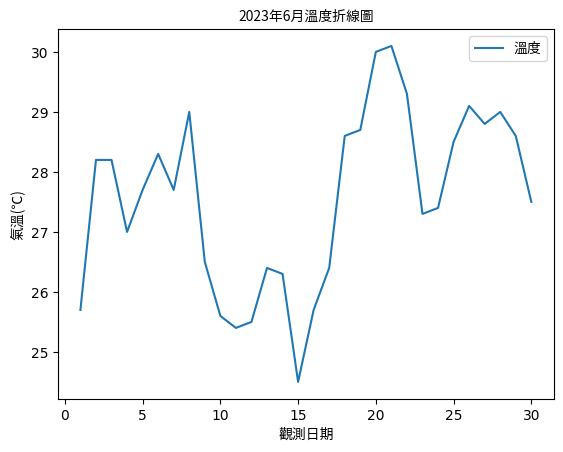

In [83]:
date = df.iloc[:,0]
temp = df.iloc[:,2]

plt.plot(date, temp, label="溫度")

plt.title("2023年6月溫度折線圖", fontproperties=myfont)
plt.xlabel("觀測日期", fontproperties=myfont)
plt.ylabel("氣溫(℃)", fontproperties=myfont)
plt.legend(loc='best', prop=myfont)

plt.show()